# Pymaceuticals Inc.
---

### Analysis
The following analysis looks at the effect of various drug regimens on mice with tumors.

- There is a positive correlation between the weight of the mouse and the average tumor volume with a correlation value of .84: larger mice get bigger tumors.
- Capomulin, Ramicane, Infubinol, and Ceftamin were the drugs with the greatest number of Timepoints tested in this study. Capomulin and Ramicane showed smaller interquartile ranges as compared to the other two drugs, and lower median final tumor volumes. This suggests that these two drugs are not only more effective, but are also more consistent in their results. The effectiveness of Capomulin can be seen in the decrease in tumor volume of mouse l509 over time.
 

In [312]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_mouse_df = pd.merge(mouse_metadata,study_results,how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
complete_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [71]:
# Checking the number of mice.
complete_mouse_df["Mouse ID"].nunique()

249

In [72]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
complete_mouse_df.set_index("Mouse ID")

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [73]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate = complete_mouse_df.loc[complete_mouse_df["Mouse ID"]=="g989"].index
duplicate

Index([908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920], dtype='int64')

In [74]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = complete_mouse_df.drop(duplicate)
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [75]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [76]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumor = clean_df.groupby(["Drug Regimen"])
tumor_mean = tumor["Tumor Volume (mm3)"].mean()
tumor_med = tumor["Tumor Volume (mm3)"].median()
tumor_var = tumor["Tumor Volume (mm3)"].var()
tumor_stddev = tumor["Tumor Volume (mm3)"].std()
tumor_sem = tumor["Tumor Volume (mm3)"].sem()

sum_tumor_df = pd.DataFrame({
    "Mean Tumor Volume": tumor_mean,
    "Median Tumor Volume": tumor_med,
    "Tumor Volume Variance": tumor_var,
    "Tumor Volume Std. Dev.": tumor_stddev,
    "Tumor Std. Err.": tumor_sem
})
sum_tumor_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [77]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
sum_tum2 = clean_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
sum_tum2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [101]:
x = clean_df["Drug Regimen"].unique()
x

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

<Axes: xlabel='Drug Regimen'>

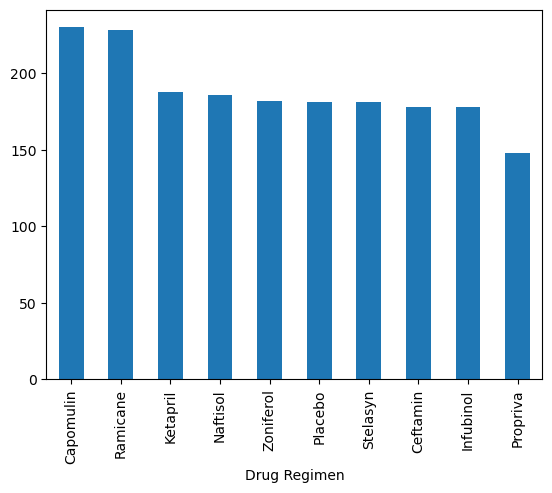

In [117]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
reg_count = tumor.count()["Timepoint"].sort_values(ascending = False)
reg_count.plot.bar()

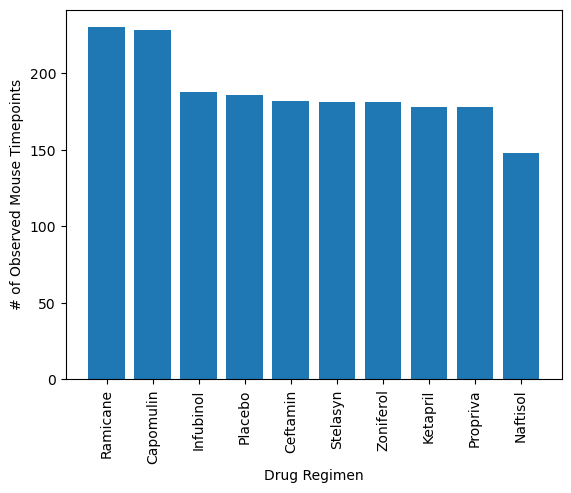

In [106]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pypl
x = clean_df["Drug Regimen"].unique()
y = tumor.count()["Timepoint"].sort_values(ascending=False)
plt.bar(x,y)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation = 90)
plt.show()

<Axes: ylabel='Sex'>

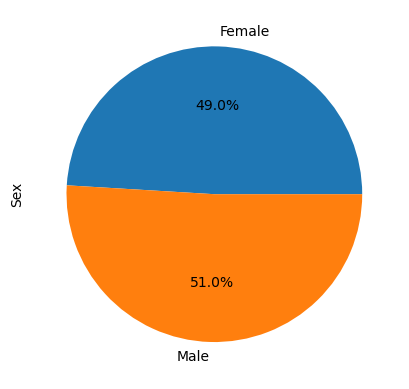

In [140]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
clean_df.groupby(["Sex"])["Sex"].count().plot.pie(autopct="%1.1f%%")


Text(0, 0.5, 'Sex')

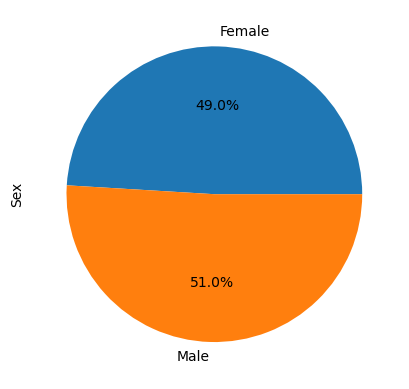

In [141]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(clean_df.groupby(["Sex"]).count()["Mouse ID"],autopct="%1.1f%%",labels=["Female", "Male"])
plt.ylabel("Sex")


## Quartiles, Outliers and Boxplots

In [149]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_timepoint = pd.DataFrame(clean_df.groupby("Mouse ID")["Timepoint"].max())
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_volume = pd.merge(final_timepoint,clean_df,how="left", on=["Mouse ID", "Timepoint"])
tumor_volume

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [239]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
cap_vol =[]
ram_vol=[]
inf_vol = []
cef_vol=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in tumor_volume.iterrows():
    if row["Drug Regimen"]=="Capomulin":
        cap_vol.append(row["Tumor Volume (mm3)"])
    if row["Drug Regimen"]=="Ramicane":
        ram_vol.append(row["Tumor Volume (mm3)"])
    if row["Drug Regimen"]=="Infubinol":
        inf_vol.append(row["Tumor Volume (mm3)"])
    if row["Drug Regimen"]=="Ceftamin":
        cef_vol.append(row["Tumor Volume (mm3)"])
    # add subset 
cap_df = pd.DataFrame(cap_vol)
ram_df  = pd.DataFrame(ram_vol)
inf_df  = pd.DataFrame(inf_vol)
cef_df  = pd.DataFrame(cef_vol)
    
    # Determine outliers using upper and lower bounds
#Campoluin
quartiles_cap = cap_df.quantile([.25,.5,.75])
lowerq_cap = quartiles_cap.loc[0.25,0]
upperq_cap = quartiles_cap.loc[0.75,0]
iqr_cap = upperq_cap - lowerq_cap
lower_bound_cap = lowerq_cap - (1.5*iqr_cap)
upper_bound_cap = upperq_cap + (1.5*iqr_cap)

#Ramicane
quartiles_ram = ram_df.quantile([.25,.5,.75])
lowerq_ram = quartiles_ram.loc[0.25,0]
upperq_ram = quartiles_ram.loc[0.75,0]
iqr_ram = upperq_ram - lowerq_ram
lower_bound_ram = lowerq_ram - (1.5*iqr_ram)
upper_bound_ram = upperq_cap + (1.5*iqr_ram)

#Infubinol
quartiles_inf = inf_df.quantile([.25,.5,.75])
lowerq_inf = quartiles_inf.loc[0.25,0]
upperq_inf = quartiles_inf.loc[0.75,0]
iqr_inf = upperq_inf - lowerq_inf
lower_bound_inf = lowerq_inf - (1.5*iqr_inf)
upper_bound_inf = upperq_inf + (1.5*iqr_inf)

#Ceftamin
quartiles_cef = cef_df.quantile([.25,.5,.75])
lowerq_cef = quartiles_cef.loc[0.25,0]
upperq_cef = quartiles_cef.loc[0.75,0]
iqr_cef = upperq_cef - lowerq_cef
lower_bound_cef = lowerq_cef - (1.5*iqr_cef)
upper_bound_cef = upperq_cef + (1.5*iqr_cef)




In [258]:
#Outliers
cap_out =cap_df.loc[(cap_df[0]<lower_bound_cap)|(cap_df[0]>upper_bound_cap)]
ram_out = ram_df.loc[(ram_df[0]<lower_bound_ram)|(ram_df[0]>upper_bound_ram)]
inf_out = inf_df.loc[(inf_df[0]<lower_bound_inf)|(inf_df[0]>upper_bound_inf)]
cef_out = cef_df.loc[(cef_df[0]<lower_bound_cef)|(cef_df[0]>upper_bound_cef)]

#Print outliers
print(f"Capomulin's potential outliers: {cap_out}")
print(f"Ramicane's potential outliers: {ram_out}")
print(f"Infubinol's potential outliers: {inf_out}")
print(f"Ceftamin's potential outliers: {cef_out}")

Capomulin's potential outliers: Empty DataFrame
Columns: [0]
Index: []
Ramicane's potential outliers: Empty DataFrame
Columns: [0]
Index: []
Infubinol's potential outliers:            0
5  36.321346
Ceftamin's potential outliers: Empty DataFrame
Columns: [0]
Index: []


([<matplotlib.axis.XTick at 0x146b9f260>,
 [Text(1, 0, 'Capomulin'),
  Text(2, 0, 'Ramicane'),
  Text(3, 0, 'Infubinol'),
  Text(4, 0, 'Ceftamin')])

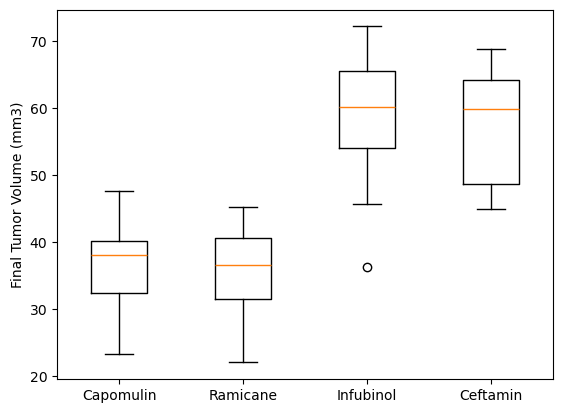

In [269]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplt_list = [
    cap_vol,
    ram_vol,
    inf_vol,
    cef_vol
]
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(boxplt_list)
plt.xticks([1,2,3,4],treatments)

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

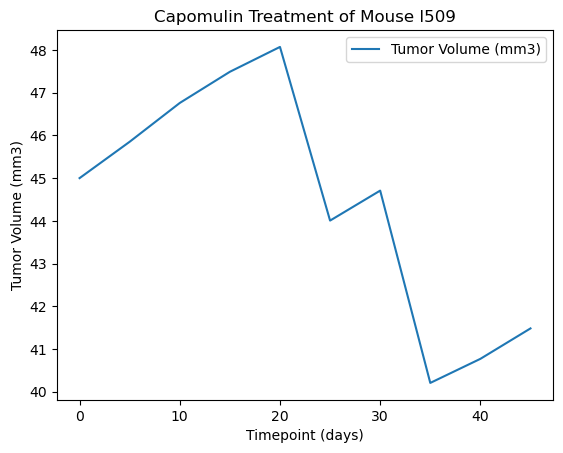

In [317]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_l509 = clean_df.loc[clean_df["Mouse ID"]=="l509"]
mouse_l509.plot.line("Timepoint","Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

<Axes: xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

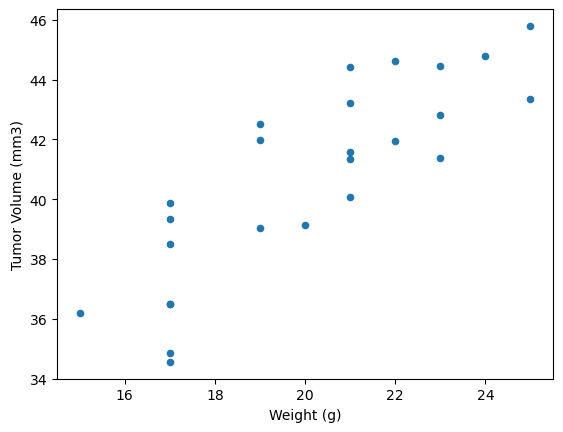

In [309]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_regimen = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
cap_regimen_avg = cap_regimen.groupby(["Mouse ID"]).mean("Tumor Volume (mm3)")
cap_regimen_avg.plot.scatter("Weight (g)","Tumor Volume (mm3)")



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


Text(0, 0.5, 'Tumor Volume (mm3)')

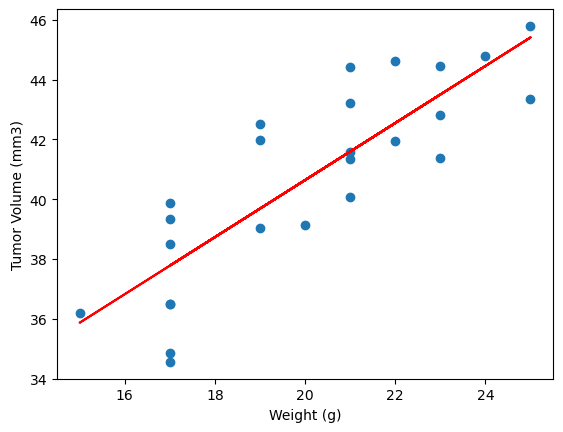

In [316]:
# Calculate the correlation coefficient and a linear regression model 
correlation = round(st.pearsonr(cap_regimen_avg["Weight (g)"],cap_regimen_avg["Tumor Volume (mm3)"])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {correlation}")
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = cap_regimen_avg["Weight (g)"]
y_values = cap_regimen_avg["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")